# Task 1  Retrieving and Preparing the Data

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
sns.set_theme(style="ticks", color_codes=True)
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,KFold
from sklearn.utils import shuffle
from sklearn import tree, metrics
from collections import Counter
import matplotlib as mpl
import statistics
import graphviz
from IPython.display import Image


In [3]:
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv"
df = pd.read_csv(dataset_url, sep=',', decimal='.', header = 0, index_col = None, error_bad_lines = False)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
# Finding the structure of the data
df.shape

(299, 13)

In [5]:
# Finding the data types of all the columns
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [6]:
# This will coerce 0 as False and any other value as True

df['anaemia'] = df['anaemia'].astype('bool')
df['high_blood_pressure'] = df['high_blood_pressure'].astype('bool')
df['diabetes'] = df['diabetes'].astype('bool')
df['smoking'] = df['smoking'].astype('bool')
df['sex'] = df['smoking'].astype('bool')
df['DEATH_EVENT'] = df['DEATH_EVENT'].astype('bool')


In [7]:
# updated data types
df.dtypes

age                         float64
anaemia                        bool
creatinine_phosphokinase      int64
diabetes                       bool
ejection_fraction             int64
high_blood_pressure            bool
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                            bool
smoking                        bool
time                          int64
DEATH_EVENT                    bool
dtype: object

In [8]:
df.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.833893,581.839465,38.083612,263358.029264,1.39388,136.625418,130.260870
std,11.894809,970.287881,11.834841,97804.236869,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25100.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212500.000000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262000.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303500.000000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850000.000000,9.40000,148.000000,285.000000


In [9]:
df[df.duplicated()]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [10]:
# finding na values in each column
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [11]:
# if any columns have more than 50% NA values, they'll be dropped
x = df.isna().sum()
y = df.count()
na_count = np.where((x/y)>0.5,True, False)
col_names = x[na_count].index

df.drop(columns =col_names, inplace = True, axis = 0)

In [12]:
# replacing all NA values with mean, if present in numeric columns
df['age'].fillna((df['age'].mean()), inplace=True)
df['creatinine_phosphokinase'].fillna((df['creatinine_phosphokinase'].mean()), inplace=True)
df['ejection_fraction'].fillna((df['ejection_fraction'].mean()), inplace=True)
df['platelets'].fillna((df['platelets'].mean()), inplace=True)
df['serum_creatinine'].fillna((df['serum_creatinine'].mean()), inplace=True)
df['serum_sodium'].fillna((df['serum_sodium'].mean()), inplace=True)
df['time'].fillna((df['time'].mean()), inplace=True)

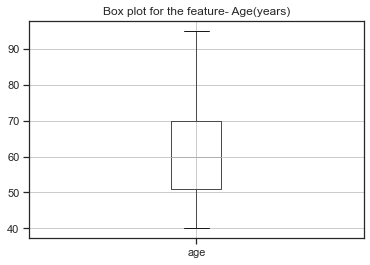

In [13]:
df.dropna().boxplot(column = 'age')
plt.title("Box plot for the feature- Age(years)")
plt.show()

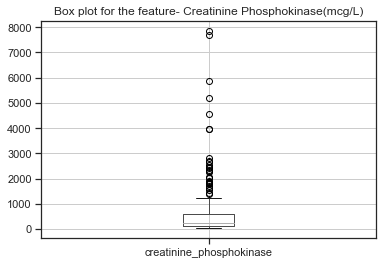

In [14]:
df.dropna().boxplot(column = 'creatinine_phosphokinase')    
plt.title("Box plot for the feature- Creatinine Phosphokinase(mcg/L)")
plt.show()

In [15]:
# clipping lower and upper bound
df['creatinine_phosphokinase'].clip(lower =23, upper = 7861, inplace = True )

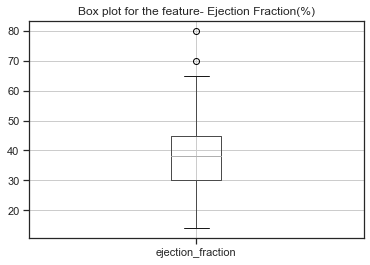

In [16]:
df.dropna().boxplot(column = 'ejection_fraction')
plt.title("Box plot for the feature- Ejection Fraction(%)")
plt.show()

In [17]:
# cliping the lower and upper bounds
df['ejection_fraction'].clip(lower =14, upper = 80, inplace = True )

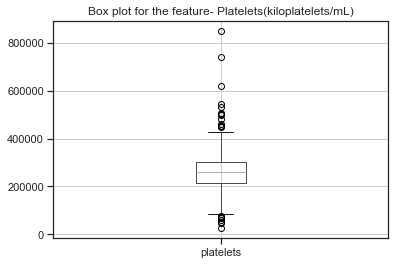

In [18]:
df.dropna().boxplot(column = 'platelets')
plt.title("Box plot for the feature- Platelets(kiloplatelets/mL)")
plt.show()

In [19]:
# converting the platelets into kiloplatelets
df['platelets'] = df['platelets']/1000

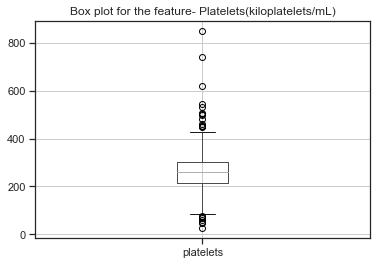

In [20]:
df.dropna().boxplot(column = 'platelets')
plt.title("Box plot for the feature- Platelets(kiloplatelets/mL)")
plt.show()

In [21]:
# cliping the lower and upper bounds
df['platelets'].clip(lower =25.01, upper = 850.00, inplace = True )

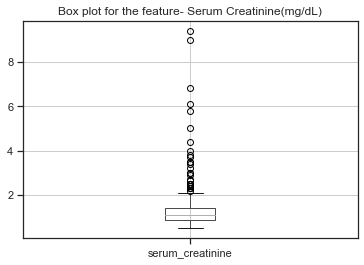

In [22]:
df.dropna().boxplot(column = 'serum_creatinine')
plt.title("Box plot for the feature- Serum Creatinine(mg/dL)")
plt.show()

In [23]:
# cliping the lower and upper bounds
df['serum_creatinine'].clip(lower =0.50, upper = 9.40, inplace = True )

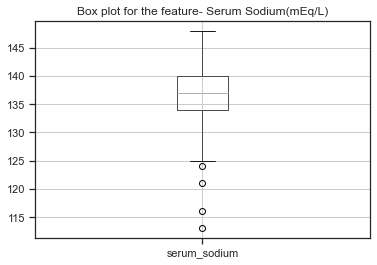

In [24]:
df.dropna().boxplot(column = 'serum_sodium')
plt.title("Box plot for the feature- Serum Sodium(mEq/L)")
plt.show()

In [25]:
# cliping the lower and upper bounds
df['serum_sodium'].clip(lower =114, upper = 148, inplace = True )

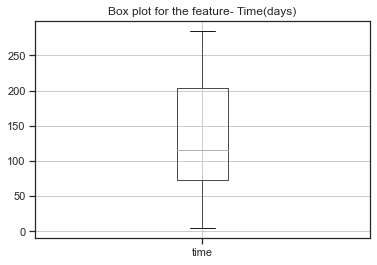

In [26]:
df.dropna().boxplot(column = 'time')
plt.title("Box plot for the feature- Time(days)")
plt.show()

In [27]:
# cliping the lower and upper bounds
df['time'].clip(lower =4, upper = 285, inplace = True )

# Task 2: Data Exploration 

## Section 1

In [28]:
df.drop(columns = 'time', inplace = True)

In [29]:
df.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.833893,581.839465,38.083612,263.358029,1.39388,136.628763
std,11.894809,970.287881,11.834841,97.804237,1.03451,4.394854
min,40.000000,23.000000,14.000000,25.100000,0.50000,114.000000
25%,51.000000,116.500000,30.000000,212.500000,0.90000,134.000000
50%,60.000000,250.000000,38.000000,262.000000,1.10000,137.000000
75%,70.000000,582.000000,45.000000,303.500000,1.40000,140.000000
max,95.000000,7861.000000,80.000000,850.000000,9.40000,148.000000


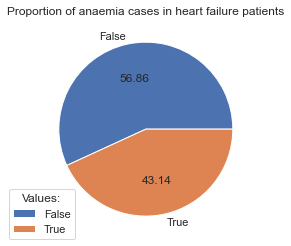

In [30]:
df['anaemia'].value_counts().plot(kind='pie',autopct='%.2f', legend = True, ylabel= "")
plt.title(label='Proportion of anaemia cases in heart failure patients')
plt.legend(title = "Values:", bbox_to_anchor=(0.2, 0.25))
plt.show()



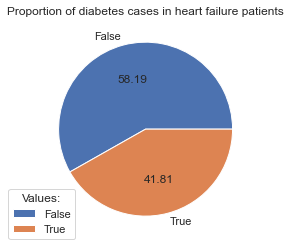

In [31]:
df['diabetes'].value_counts().plot(kind='pie',autopct='%.2f', legend = True,ylabel= "")
plt.title(label='Proportion of diabetes cases in heart failure patients')
plt.legend(title = "Values:", bbox_to_anchor=(0.2, 0.25))
plt.show()

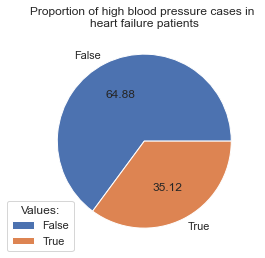

In [32]:
df['high_blood_pressure'].value_counts().plot(kind='pie',autopct='%.2f', legend = True,ylabel= "")
plt.title(label='Proportion of high blood pressure cases in \nheart failure patients')
plt.legend(title = "Values:", bbox_to_anchor=(0.2, 0.25))
plt.show()

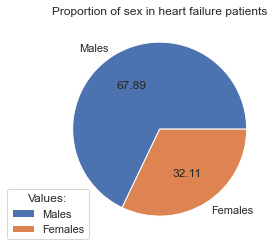

In [33]:
df['sex'].value_counts().plot(kind='pie',autopct='%.2f', legend = True,labels= ['Males','Females'],ylabel= "")
plt.title(label='Proportion of sex in heart failure patients')
plt.legend(title = "Values:", bbox_to_anchor=(0.2, 0.25))
plt.show()

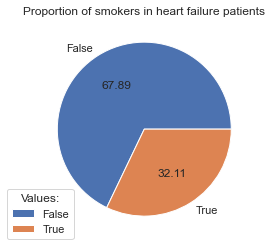

In [34]:
df['smoking'].value_counts().plot(kind='pie',autopct='%.2f', legend = True,ylabel= "")
plt.title(label='Proportion of smokers in heart failure patients')
plt.legend(title = "Values:", bbox_to_anchor=(0.2, 0.25))
plt.show()

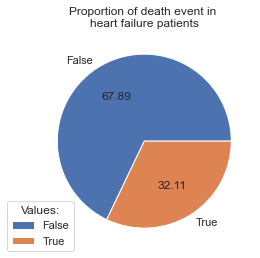

In [35]:
df['DEATH_EVENT'].value_counts().plot(kind='pie',autopct='%.2f', legend = True,ylabel= "")
plt.title(label='Proportion of death event in \nheart failure patients')
plt.legend(title = "Values:", bbox_to_anchor=(0.2, 0.25))
plt.show()

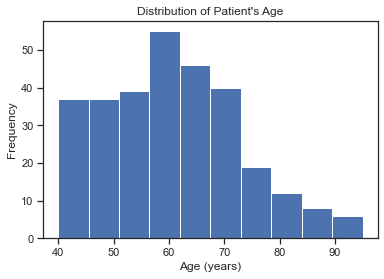

In [36]:
df['age'].plot(kind='hist',bins=10)
plt.title("Distribution of Patient's Age")
plt.xlabel('Age (years)')
plt.show()


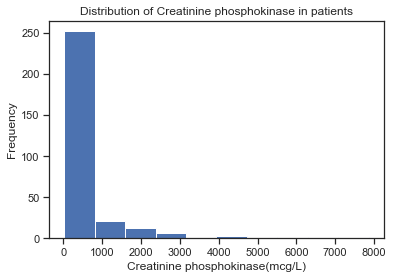

In [37]:
df['creatinine_phosphokinase'].plot(kind='hist')
plt.title('Distribution of Creatinine phosphokinase in patients')
plt.xlabel('Creatinine phosphokinase(mcg/L)')
plt.show()

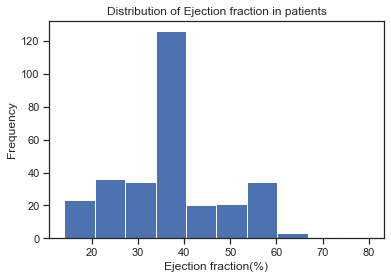

In [38]:
df['ejection_fraction'].plot(kind='hist',bins=10)
plt.title('Distribution of Ejection fraction in patients')
plt.xlabel('Ejection fraction(%)')
plt.show()

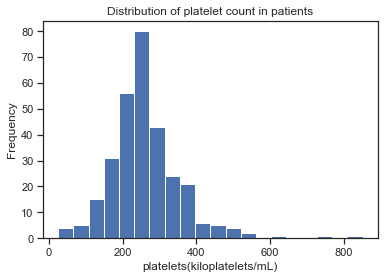

In [39]:
df['platelets'].plot(kind='hist',bins=20)
plt.title('Distribution of platelet count in patients')
plt.xlabel('platelets(kiloplatelets/mL)')
plt.show()

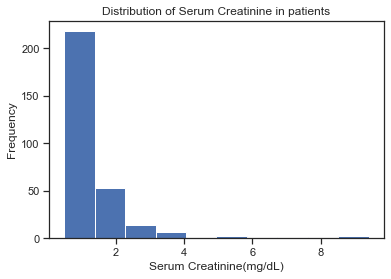

In [40]:
df['serum_creatinine'].plot(kind='hist',bins=10)
plt.title('Distribution of Serum Creatinine in patients')
plt.xlabel('Serum Creatinine(mg/dL)')
plt.show()

## Section 2

Since death event is the target feature, we will first plot all the rest of the features against death event to identify the relationship between them. Checking primary relationship to identify features that will directly affect death event. Time feature is dropped from the dataframe as it is not informative.

Change death event to rate of death event as count of values in categorical variables has significant difference which might give misleading visual when showing death event count. The way to identify whether there is relationship is one type of value sits under 0.5 and the other one goes above.

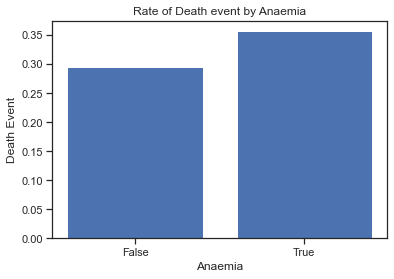

In [41]:
anaemia_counts = df.dropna()['anaemia'].value_counts()
mask_anaemia_n = df['anaemia'] == 0
mask_anaemia_y = df['anaemia'] == 1
n_death = df.dropna().loc[mask_anaemia_n, 'DEATH_EVENT'].value_counts()
y_death = df.dropna().loc[mask_anaemia_y, 'DEATH_EVENT'].value_counts()

rate = [n_death[1] / float(anaemia_counts[0]), y_death[1] / float(anaemia_counts[1])]
plt.bar(list(range(2)), rate, color = 'b', align = 'center')
plt.xticks(list(range(2)), ['False', 'True'])
plt.xlabel('Anaemia')
plt.ylabel('Death Event')
plt.title('Rate of Death event by Anaemia')
plt.show()

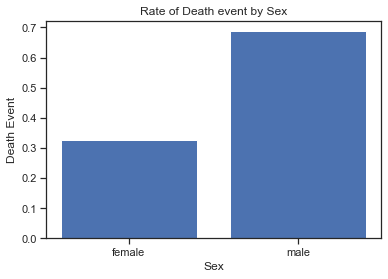

In [42]:
sex_counts = df.dropna()['sex'].value_counts()
mask_sex_f = df['sex'] == 0
mask_sex_m = df['sex'] == 1
f_death = df.dropna().loc[mask_sex_f, 'DEATH_EVENT'].value_counts()
m_death = df.dropna().loc[mask_sex_m, 'DEATH_EVENT'].value_counts()

rate = [f_death[1] / float(sex_counts[0]), f_death[1] / float(sex_counts[1])]
plt.bar(list(range(2)), rate, color = 'b', align = 'center')
plt.xticks(list(range(2)), ['female', 'male'])
plt.xlabel('Sex')
plt.ylabel('Death Event')
plt.title('Rate of Death event by Sex')
plt.show()

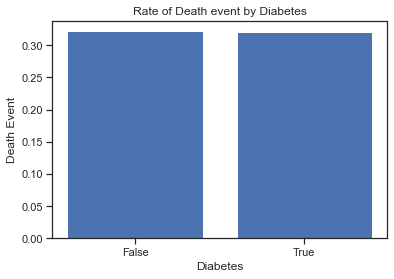

In [43]:
diabetes_counts = df.dropna()['diabetes'].value_counts()
mask_diabetes_n = df['diabetes'] == 0
mask_diabetes_y = df['diabetes'] == 1
n_death = df.dropna().loc[mask_diabetes_n, 'DEATH_EVENT'].value_counts()
y_death = df.dropna().loc[mask_diabetes_y, 'DEATH_EVENT'].value_counts()

rate = [n_death[1] / float(diabetes_counts[0]), y_death[1] / float(diabetes_counts[1])]
plt.bar(list(range(2)), rate, color = 'b', align = 'center')
plt.xticks(list(range(2)), ['False', 'True'])
plt.xlabel('Diabetes')
plt.ylabel('Death Event')
plt.title('Rate of Death event by Diabetes')
plt.show()

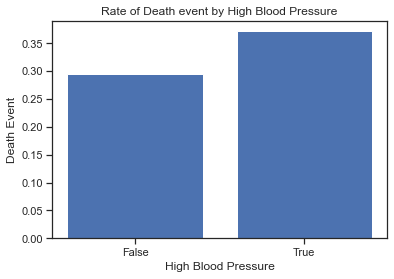

In [44]:
high_blood_pressure_counts = df.dropna()['high_blood_pressure'].value_counts()
mask_high_blood_pressure_n = df['high_blood_pressure'] == 0
mask_high_blood_pressure_y = df['high_blood_pressure'] == 1
n_death = df.dropna().loc[mask_high_blood_pressure_n, 'DEATH_EVENT'].value_counts()
y_death = df.dropna().loc[mask_high_blood_pressure_y, 'DEATH_EVENT'].value_counts()

rate = [n_death[1] / float(high_blood_pressure_counts[0]), y_death[1] / float(high_blood_pressure_counts[1])]
plt.bar(list(range(2)), rate, color = 'b', align = 'center')
plt.xticks(list(range(2)), ['False', 'True'])
plt.xlabel('High Blood Pressure')
plt.ylabel('Death Event')
plt.title('Rate of Death event by High Blood Pressure')
plt.show()

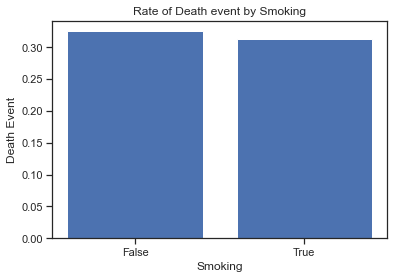

In [45]:
smoking_counts = df.dropna()['smoking'].value_counts()
mask_smoking_n = df['smoking'] == 0
mask_smoking_y = df['smoking'] == 1
n_death = df.dropna().loc[mask_smoking_n, 'DEATH_EVENT'].value_counts()
y_death = df.dropna().loc[mask_smoking_y, 'DEATH_EVENT'].value_counts()

rate = [n_death[1] / float(smoking_counts[0]), y_death[1] / float(smoking_counts[1])]
plt.bar(list(range(2)), rate, color = 'b', align = 'center')
plt.xticks(list(range(2)), ['False', 'True'])
plt.xlabel('Smoking')
plt.ylabel('Death Event')
plt.title('Rate of Death event by Smoking')
plt.show()

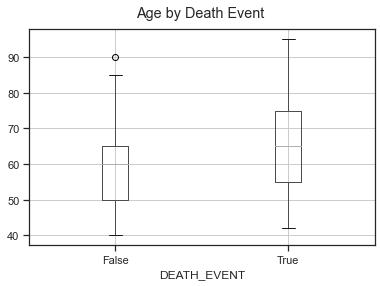

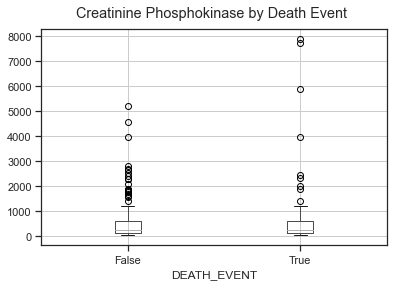

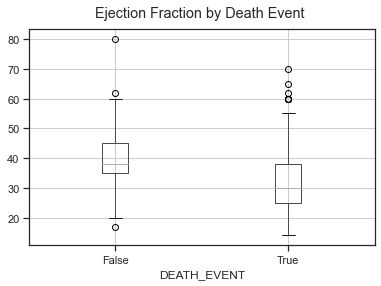

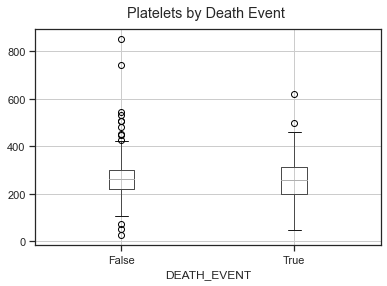

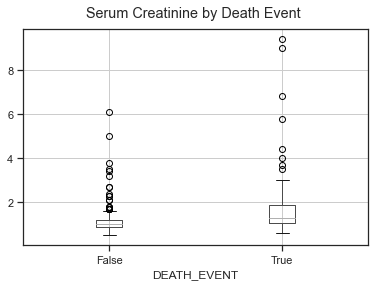

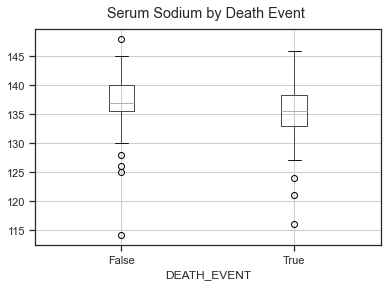

In [46]:
df.dropna().boxplot(column = 'age', by = 'DEATH_EVENT')
plt.suptitle("Age by Death Event ")
plt.title("")
plt.show()
df.dropna().boxplot(column = 'creatinine_phosphokinase', by = 'DEATH_EVENT')
plt.suptitle("Creatinine Phosphokinase by Death Event ")
plt.title("")
plt.show()
df.dropna().boxplot(column = 'ejection_fraction', by = 'DEATH_EVENT')
plt.suptitle("Ejection Fraction by Death Event ")
plt.title("")
plt.show()
df.dropna().boxplot(column = 'platelets', by = 'DEATH_EVENT')
plt.suptitle("Platelets by Death Event ")
plt.title("")
plt.show()
df.dropna().boxplot(column = 'serum_creatinine', by = 'DEATH_EVENT')
plt.suptitle("Serum Creatinine by Death Event ")
plt.title("")
plt.show()
df.dropna().boxplot(column = 'serum_sodium', by = 'DEATH_EVENT')
plt.suptitle("Serum Sodium by Death Event ")
plt.title("")
plt.show()

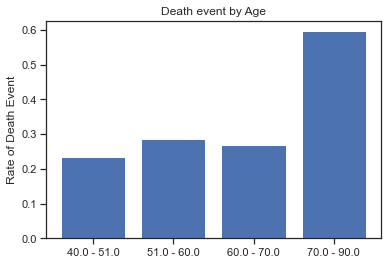

In [47]:
df['age_cat'] = pd.qcut(df['age'], 4)
age_counts = df.dropna()['age_cat'].value_counts()
mask_age_1 = df['age_cat'] == pd.Interval(39.999, 51.0, closed='right')
mask_age_2 = df['age_cat'] == pd.Interval(51.0, 60.0, closed='right')
mask_age_3 = df['age_cat'] == pd.Interval(60.0, 70.0, closed='right')
mask_age_4 = df['age_cat'] == pd.Interval(70.0, 95.0, closed='right')
a_death = df.dropna().loc[mask_age_1, 'DEATH_EVENT'].value_counts()
b_death = df.dropna().loc[mask_age_2, 'DEATH_EVENT'].value_counts()
c_death = df.dropna().loc[mask_age_3, 'DEATH_EVENT'].value_counts()
d_death = df.dropna().loc[mask_age_4, 'DEATH_EVENT'].value_counts()

rate = [a_death[1] / float(age_counts[0]), b_death[1] / float(age_counts[1]), c_death[1] / float(age_counts[2]), d_death[1] / float(age_counts[3])]
plt.bar(list(range(4)), rate, color = 'b', align = 'center')
plt.xticks(list(range(4)), ['40.0 - 51.0', '51.0 - 60.0', '60.0 - 70.0', '70.0 - 90.0'])
plt.ylabel('Rate of Death Event')
plt.title('Death event by Age')
plt.show()

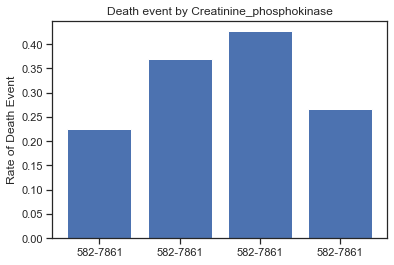

In [48]:
df['creatinine_phosphokinase_cat'] = pd.qcut(df['creatinine_phosphokinase'], 4)
creatinine_phosphokinase_counts = df.dropna()['creatinine_phosphokinase_cat'].value_counts()
mask_creatinine_phosphokinase_1 = df['creatinine_phosphokinase_cat'] == pd.Interval(22.999, 116.5, closed='right')
mask_creatinine_phosphokinase_2 = df['creatinine_phosphokinase_cat'] == pd.Interval(116.5, 250.0, closed='right')
mask_creatinine_phosphokinase_3 = df['creatinine_phosphokinase_cat'] == pd.Interval(250.0, 582.0, closed='right')
mask_creatinine_phosphokinase_4 = df['creatinine_phosphokinase_cat'] == pd.Interval(582.0, 7861.0, closed='right')
a_death = df.dropna().loc[mask_creatinine_phosphokinase_1, 'DEATH_EVENT'].value_counts()
b_death = df.dropna().loc[mask_creatinine_phosphokinase_2, 'DEATH_EVENT'].value_counts()
c_death = df.dropna().loc[mask_creatinine_phosphokinase_3, 'DEATH_EVENT'].value_counts()
d_death = df.dropna().loc[mask_creatinine_phosphokinase_4, 'DEATH_EVENT'].value_counts()

rate = [a_death[1] / float(creatinine_phosphokinase_counts[0]), b_death[1] / float(creatinine_phosphokinase_counts[1]), c_death[1] / float(creatinine_phosphokinase_counts[2]), d_death[1] / float(creatinine_phosphokinase_counts[3])]
plt.bar(list(range(4)), rate, color = 'b', align = 'center')
plt.xticks(list(range(4)), ['582-7861', '582-7861', '582-7861', '582-7861'])
plt.ylabel('Rate of Death Event')
plt.title('Death event by Creatinine_phosphokinase')
plt.show()

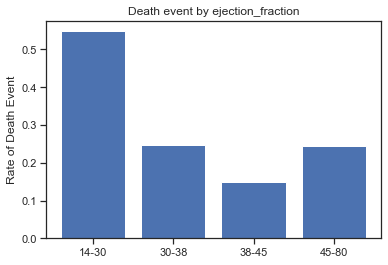

In [49]:
df['ejection_fraction_cat'] = pd.qcut(df['ejection_fraction'], 4)
ejection_fraction_counts = df.dropna()['ejection_fraction_cat'].value_counts()
mask_ejection_fraction_1 = df['ejection_fraction_cat'] == pd.Interval(13.999, 30.0, closed='right')
mask_ejection_fraction_2 = df['ejection_fraction_cat'] == pd.Interval(30.0, 38.0, closed='right')
mask_ejection_fraction_3 = df['ejection_fraction_cat'] == pd.Interval(38.0, 45.0, closed='right')
mask_ejection_fraction_4 = df['ejection_fraction_cat'] == pd.Interval(45.0, 80.0, closed='right')
a_death = df.dropna().loc[mask_ejection_fraction_1, 'DEATH_EVENT'].value_counts()
b_death = df.dropna().loc[mask_ejection_fraction_2, 'DEATH_EVENT'].value_counts()
c_death = df.dropna().loc[mask_ejection_fraction_3, 'DEATH_EVENT'].value_counts()
d_death = df.dropna().loc[mask_ejection_fraction_4, 'DEATH_EVENT'].value_counts()

rate = [a_death[1] / float(ejection_fraction_counts[0]), b_death[1] / float(ejection_fraction_counts[1]), c_death[1] / float(ejection_fraction_counts[2]), d_death[1] / float(ejection_fraction_counts[3])]
plt.bar(list(range(4)), rate, color = 'b', align = 'center')
plt.xticks(list(range(4)), ['14-30', '30-38', '38-45', '45-80'])
plt.ylabel('Rate of Death Event')
plt.title('Death event by ejection_fraction')
plt.show()

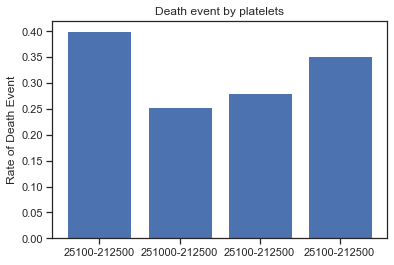

In [50]:
df['platelets_cat'] = pd.qcut(df['platelets'], 4)
platelets_counts = df.dropna()['platelets_cat'].value_counts()
mask_platelets_1 = df['platelets_cat'] == pd.Interval(25.099, 212.5, closed='right')
mask_platelets_2 = df['platelets_cat'] == pd.Interval(212.5, 262.0, closed='right')
mask_platelets_3 = df['platelets_cat'] == pd.Interval(262.0, 303.5, closed='right')
mask_platelets_4 = df['platelets_cat'] == pd.Interval(303.5, 850.0, closed='right')
a_death = df.dropna().loc[mask_platelets_1, 'DEATH_EVENT'].value_counts()
b_death = df.dropna().loc[mask_platelets_2, 'DEATH_EVENT'].value_counts()
c_death = df.dropna().loc[mask_platelets_3, 'DEATH_EVENT'].value_counts()
d_death = df.dropna().loc[mask_platelets_4, 'DEATH_EVENT'].value_counts()

rate = [a_death[1] / float(platelets_counts[0]), b_death[1] / float(platelets_counts[1]), c_death[1] / float(platelets_counts[2]), d_death[1] / float(platelets_counts[3])]
plt.bar(list(range(4)), rate, color = 'b', align = 'center')
plt.xticks(list(range(4)), ['25100-212500', '251000-212500', '25100-212500', '25100-212500'])
plt.ylabel('Rate of Death Event')
plt.title('Death event by platelets')
#plt.rcParams["figure.figsize"] = (15,3)
plt.show()

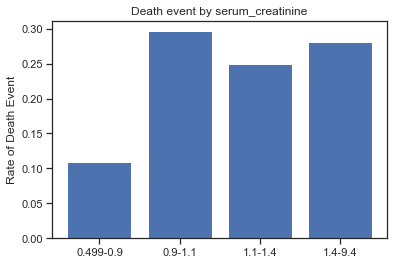

In [51]:
df['serum_creatinine_cat'] = pd.qcut(df['serum_creatinine'], 4)
serum_creatinine_counts = df.dropna()['serum_creatinine_cat'].value_counts()

mask_serum_creatinine_1 = df['serum_creatinine_cat'] == pd.Interval(0.499, 0.9, closed='right')
mask_serum_creatinine_2 = df['serum_creatinine_cat'] == pd.Interval(0.9, 1.1, closed='right')
mask_serum_creatinine_3 = df['serum_creatinine_cat'] == pd.Interval(1.1, 1.4, closed='right')
mask_serum_creatinine_4 = df['serum_creatinine_cat'] == pd.Interval(1.4, 9.4, closed='right')
a_death = df.dropna().loc[mask_serum_creatinine_1, 'DEATH_EVENT'].value_counts()
b_death = df.dropna().loc[mask_serum_creatinine_2, 'DEATH_EVENT'].value_counts()
c_death = df.dropna().loc[mask_serum_creatinine_3, 'DEATH_EVENT'].value_counts()


rate = [a_death[1] / float(serum_creatinine_counts[0]), b_death[1] / float(serum_creatinine_counts[1]), c_death[1] / float(serum_creatinine_counts[2]), c_death[1] / float(serum_creatinine_counts[3])]
plt.bar(list(range(4)), rate, color = 'b', align = 'center')
plt.xticks(list(range(4)), ['0.499-0.9', '0.9-1.1', '1.1-1.4', '1.4-9.4'])
plt.ylabel('Rate of Death Event')
plt.title('Death event by serum_creatinine')
plt.show()

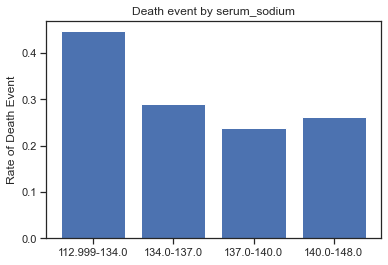

In [52]:
df['serum_sodium_cat'] = pd.qcut(df['serum_sodium'], 4)
serum_sodium_counts = df.dropna()['serum_sodium_cat'].value_counts()
mask_serum_sodium_1 = df['serum_sodium_cat'] == pd.Interval(113.999, 134.0, closed='right')
mask_serum_sodium_2 = df['serum_sodium_cat'] == pd.Interval(134.0, 137.0, closed='right')
mask_serum_sodium_3 = df['serum_sodium_cat'] == pd.Interval(137.0, 140.0, closed='right')
mask_serum_sodium_4 = df['serum_sodium_cat'] == pd.Interval(140.0, 148.0, closed='right')
a_death = df.dropna().loc[mask_serum_sodium_1, 'DEATH_EVENT'].value_counts()
b_death = df.dropna().loc[mask_serum_sodium_2, 'DEATH_EVENT'].value_counts()
c_death = df.dropna().loc[mask_serum_sodium_3, 'DEATH_EVENT'].value_counts()
d_death = df.dropna().loc[mask_serum_sodium_4, 'DEATH_EVENT'].value_counts()

rate = [a_death[1] / float(serum_sodium_counts[0]), b_death[1] / float(serum_sodium_counts[1]), c_death[1] / float(serum_sodium_counts[2]), d_death[1] / float(serum_sodium_counts[3])]
plt.bar(list(range(4)), rate, color = 'b', align = 'center')
plt.xticks(list(range(4)), ['112.999-134.0', '134.0-137.0', '137.0-140.0', '140.0-148.0'])
plt.ylabel('Rate of Death Event')
plt.title('Death event by serum_sodium')
plt.show()

In [53]:
df.drop(columns = ['age_cat', 'creatinine_phosphokinase_cat',
       'ejection_fraction_cat', 'platelets_cat', 'serum_creatinine_cat',
       'serum_sodium_cat'], inplace = True)

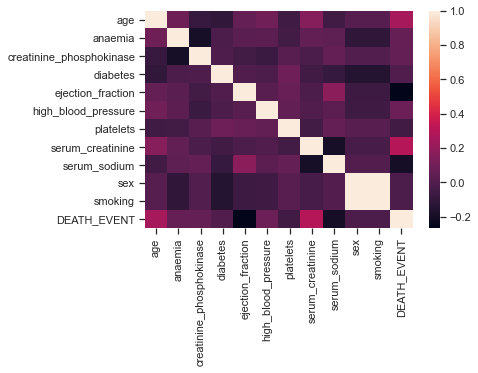

In [54]:
sns.heatmap(df.corr())
plt.show()

In [55]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.046204,0.018668,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041386,-0.107290,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.060284,0.002421,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089010,-0.147173,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.176409,-0.067315,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.036697,-0.055711,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062374,0.028234,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189554,-0.027414,-0.027414,0.294278
serum_sodium,-0.046204,0.041386,0.060284,-0.089010,0.176409,0.036697,0.062374,-0.189554,1.000000,0.005941,0.005941,-0.196511
sex,0.018668,-0.107290,0.002421,-0.147173,-0.067315,-0.055711,0.028234,-0.027414,0.005941,1.000000,1.000000,-0.012623


Continous vs Continuous

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


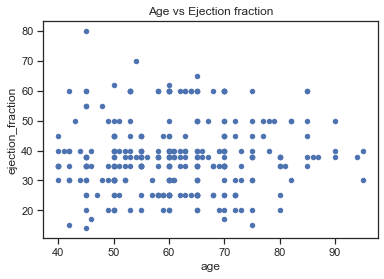

In [56]:
df.plot.scatter(x='age', y='ejection_fraction', title='Age vs Ejection fraction')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


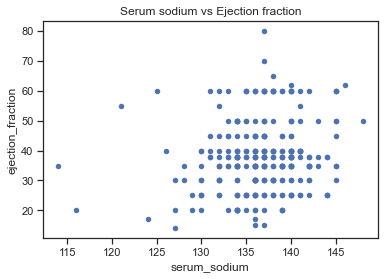

In [57]:
df.plot.scatter(x='serum_sodium', y='ejection_fraction', title='Serum sodium vs Ejection fraction')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


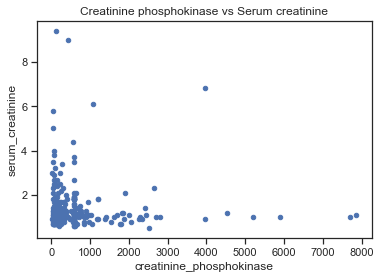

In [58]:
df.plot.scatter(x='creatinine_phosphokinase', y='serum_creatinine', title='Creatinine phosphokinase vs Serum creatinine')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


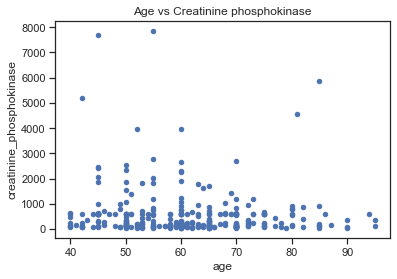

In [59]:
df.plot.scatter(x='age', y='creatinine_phosphokinase', title='Age vs Creatinine phosphokinase')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


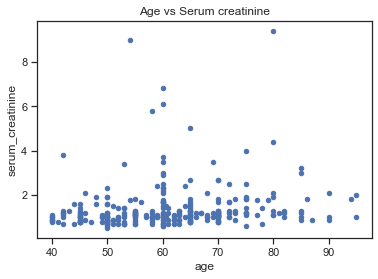

In [60]:
df.plot.scatter(x='age', y='serum_creatinine', title='Age vs Serum creatinine')
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


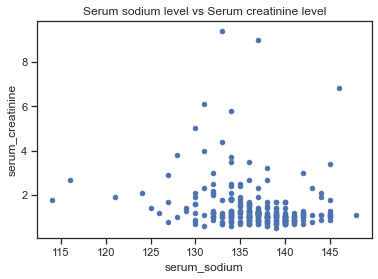

In [61]:
df.plot.scatter(x='serum_sodium', y='serum_creatinine', title='Serum sodium level vs Serum creatinine level')
plt.show()

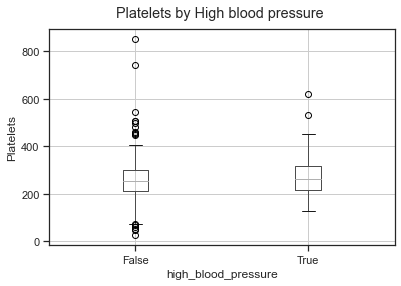

In [62]:
df.boxplot(column = 'platelets', by='high_blood_pressure')
plt.suptitle("Platelets by High blood pressure ")
plt.ylabel("Platelets")
plt.title("")
plt.show()

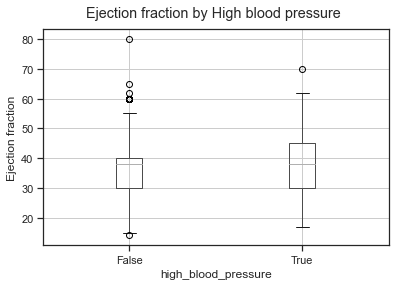

In [63]:
df.boxplot(column = 'ejection_fraction', by='high_blood_pressure')
plt.suptitle("Ejection fraction by High blood pressure ")
plt.ylabel("Ejection fraction")
plt.title("")
plt.show()

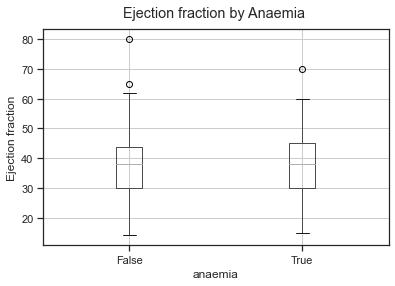

In [64]:
df.boxplot(column = 'ejection_fraction', by='anaemia')
plt.suptitle("Ejection fraction by Anaemia ")
plt.ylabel("Ejection fraction")
plt.title("")
plt.show()

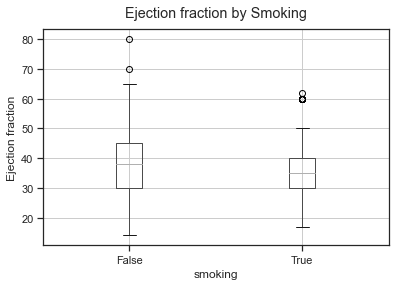

In [65]:
df.boxplot(column = 'ejection_fraction', by='smoking')
plt.suptitle("Ejection fraction by Smoking")
plt.ylabel("Ejection fraction")
plt.title("")
plt.show()

#Task 3: Data modelling

## Train/Test Data Split



In [66]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [67]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

In [68]:
print("X_train data shape-", X_train.shape)
print("Y_train data shape-", X_test.shape)
print("X_test data shape-", Y_train.shape)
print("Y_test data shape-", Y_test.shape)

X_train data shape- (239, 11)
Y_train data shape- (60, 11)
X_test data shape- (239,)
Y_test data shape- (60,)


In [69]:
print(Counter(Y_train))
print(Counter(Y_test))

Counter({False: 162, True: 77})
Counter({False: 41, True: 19})


## KNN


### Feature Selection and Parameter Tuning

In [70]:
# Feature selection
col_num = x.shape[1]

new_Ind = []
cur_MaxScore = 0.5
col_Ind_Random = shuffle(range(0,col_num), random_state = 0)

for cur_f in range(0,col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X_train[:,new_Ind].copy()
    x_train, x_validate, y_train, y_validate = train_test_split(newData, Y_train, test_size = 0.2, random_state = 0, stratify = Y_train)
    clf = KNeighborsClassifier(3)
    fit = clf.fit(x_train, y_train)
    cur_Score = clf.score(x_validate, y_validate)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print(new_Ind)
        print("Score with "+ str(len(new_Ind)) + " selected features: "+ str(cur_Score))


[4]
Score with 1 selected features: 0.6458333333333334
[4, 9]
Score with 2 selected features: 0.6666666666666666
[4, 9, 10]
Score with 3 selected features: 0.6666666666666666
[4, 9, 10, 7]
Score with 4 selected features: 0.75
[4, 9, 10, 7, 3]
Score with 5 selected features: 0.75


In [71]:
# Paramter tuning

newData = X_train[:,new_Ind].copy()
x_train, x_validate, y_train, y_validate = train_test_split(newData, Y_train, test_size = 0.2, random_state = 0, stratify = Y_train)


loop_MaxScore = 0.0
iteri = -1
for i in range(3,6):
    cur_Score = 0.0
    iterj = -1
    
    for j in range(4):
        if(j == 0):
            clf = KNeighborsClassifier(n_neighbors=i)
            fit = clf.fit(x_train, y_train)
            loop_score = clf.score(x_validate, y_validate)
            iloop_weight_val = "uniform"
            iloop_pval = 2
        elif(j == 1):
            clf = KNeighborsClassifier(n_neighbors=i, p = 1)
            fit = clf.fit(x_train, y_train)
            loop_score = clf.score(x_validate, y_validate)
            iloop_weight_val = "uniform"
            iloop_pval = 1
        elif(j == 2):
            clf = KNeighborsClassifier(n_neighbors=i, weights= "distance", p = 1)
            fit = clf.fit(x_train, y_train)
            loop_score = clf.score(x_validate, y_validate)
            iloop_weight_val = "distance"
            iloop_pval = 1
        elif(j == 3):
            clf = KNeighborsClassifier(n_neighbors=i, weights= "distance")
            fit = clf.fit(x_train, y_train)
            loop_score = clf.score(x_validate, y_validate)
            iloop_weight_val = "distance"
            iloop_pval = 1
        if(loop_score> cur_Score):
            cur_Score = loop_score
            oloop_i = i
            oloop_weight_val = iloop_weight_val
            oloop_pval = iloop_pval
            print("Paramter tuning:",cur_Score, oloop_i,oloop_weight_val, oloop_pval)
                
    if(cur_Score > loop_MaxScore):
        loop_MaxScore = cur_Score
        neighbour_val = oloop_i
        weight_val = oloop_weight_val
        pval = oloop_pval
        

print("The best parameters are: neighbour value = "+str(neighbour_val)+", Weight value = '"+str(weight_val)+"', p-value = "+str(pval)+" with the score:"+str(loop_MaxScore))




Paramter tuning: 0.75 3 uniform 2
Paramter tuning: 0.75 4 uniform 2
Paramter tuning: 0.6875 5 uniform 2
The best parameters are: neighbour value = 3, Weight value = 'uniform', p-value = 2 with the score:0.75


### Model Training

In [72]:
# training a model with the best features and best parameters
clf1 = KNeighborsClassifier(n_neighbors= neighbour_val, weights= weight_val, p=pval)
fit = clf1.fit(x_train, y_train)
score = clf1.score(x_validate, y_validate)
print(score)
#print(neighbour_val, weight_val,pval, new_Ind, score)

0.75


### Model Validation 

In [73]:
# model validation using k-fold
dfInstances = X_train[:,new_Ind]
dfTarget = Y_train
results = []
kf = KFold(n_splits=10,random_state=0, shuffle=True)
for k, (train_index, test_index) in enumerate(kf.split(dfInstances)):
  x_train, x_validate = dfInstances[train_index], dfInstances[test_index]
  y_train, y_validate = dfTarget[train_index], dfTarget[test_index]
  clf = KNeighborsClassifier(n_neighbors=neighbour_val, weights=weight_val, p=pval)
  fit = clf.fit(x_train, y_train)
  print("[fold {0}] score: {1:.5f}".format(k, clf.score(x_validate, y_validate)))
  results.append(clf.score(x_validate, y_validate))


[fold 0] score: 0.79167
[fold 1] score: 0.70833
[fold 2] score: 0.62500
[fold 3] score: 0.66667
[fold 4] score: 0.83333
[fold 5] score: 0.70833
[fold 6] score: 0.79167
[fold 7] score: 0.75000
[fold 8] score: 0.70833
[fold 9] score: 0.91304


In [74]:
print(statistics.mean(results))

0.7496376811594203


### Model Testing

In [75]:
X_test = X_test[:,new_Ind].copy()
knn_predicted = clf1.predict(X_test)
knn_predicted

array([False, False,  True, False, False,  True, False, False, False,
       False, False,  True,  True, False, False, False, False, False,
       False,  True,  True, False, False, False,  True,  True,  True,
       False, False, False,  True, False, False, False, False, False,
        True, False, False, False,  True, False, False, False, False,
       False,  True, False,  True, False,  True, False, False, False,
       False, False, False, False,  True, False])

In [76]:
Y_test

array([False,  True, False,  True, False,  True,  True, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True,  True, False,  True, False, False, False,  True, False,
       False,  True, False,  True, False, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False, False,  True,
       False, False, False, False, False,  True])

In [77]:
knn_predicted.shape

(60,)

In [78]:
knn_cm = confusion_matrix(Y_test,knn_predicted)
knn_cm

array([[33,  8],
       [11,  8]], dtype=int64)

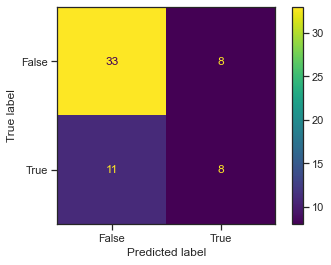

In [79]:
disp=ConfusionMatrixDisplay(knn_cm,display_labels=clf.classes_)
disp.plot()
#sns.heatmap(knn_cm, annot = True)
plt.show()

In [80]:
print(classification_report(Y_test, knn_predicted))

              precision    recall  f1-score   support

       False       0.75      0.80      0.78        41
        True       0.50      0.42      0.46        19

    accuracy                           0.68        60
   macro avg       0.62      0.61      0.62        60
weighted avg       0.67      0.68      0.68        60



In [81]:
print("[Train/test split] score for KNN: {:.5f}".format(clf1.score(X_test, Y_test)))

[Train/test split] score for KNN: 0.68333


## Decision tree

### Feature Selection and Parameter Tuning

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify =y)

In [83]:
# Feature selection
col_num = x.shape[1]
new_Ind = []
cur_MaxScore = 0.5
col_Ind_Random = shuffle(range(0,col_num), random_state = 0)

for cur_f in range(0,col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = X_train[:,new_Ind].copy()
    x_train, x_validate, y_train, y_validate = train_test_split(newData, Y_train, test_size = 0.20, random_state = 0, stratify = Y_train)
    clf = DecisionTreeClassifier(random_state=0)
    fit = clf.fit(x_train, y_train)
    cur_Score = clf.score(x_validate, y_validate)
    if cur_Score <= cur_MaxScore:
      new_Ind.remove(col_Ind_Random[cur_f])
    else:
      cur_MaxScore = cur_Score
      print("Score with columns"+ str(new_Ind) + ": " + str(cur_Score))

clf.tree_.max_depth
new_Ind

Score with columns[4]: 0.7291666666666666
Score with columns[4, 7]: 0.75


[4, 7]

In [84]:
# Parameter tuning
newData = X_train[:,new_Ind].copy()
x_train, x_validate, y_train, y_validate = train_test_split(newData, Y_train, test_size = 0.20, random_state = 0, stratify =Y_train)


loop_MaxScore = 0.0
iteri = -1
num = clf.tree_.max_depth
for i in range(1, num+1):
    cur_Score = 0.0
    iterj = -1
    
    for j in range(4):
        if(j == 0):
            clf = DecisionTreeClassifier(max_depth=i, random_state=0)
            fit = clf.fit(x_train, y_train)
            loop_score = clf.score(x_validate, y_validate)
            iloop_criterion = "gini"
            iloop_splitter = "best"
        elif(j == 1):
            clf = DecisionTreeClassifier(criterion="entropy", max_depth=i, random_state=0)
            fit = clf.fit(x_train, y_train)
            loop_score = clf.score(x_validate, y_validate)
            iloop_criterion = "entropy"
            iloop_splitter = "best"
        elif(j == 2):
            clf = DecisionTreeClassifier(criterion="entropy", splitter='random', max_depth=i, random_state=0)
            fit = clf.fit(x_train, y_train)
            loop_score = clf.score(x_validate, y_validate)
            iloop_criterion = "entropy"
            iloop_splitter = "random"
        elif(j == 3):
            clf = DecisionTreeClassifier(splitter='random', max_depth=i, random_state=0)
            fit = clf.fit(x_train, y_train)
            loop_score = clf.score(x_validate, y_validate)
            iloop_criterion = "gini"
            iloop_splitter = "random"
        if(loop_score> cur_Score):
            cur_Score = loop_score
            oloop_i = i
            oloop_criterion = iloop_criterion
            oloop_splitter = iloop_splitter
            print("Paramter tuning:",cur_Score, oloop_i,oloop_criterion, oloop_splitter)
                
    if(cur_Score > loop_MaxScore):
        loop_MaxScore = cur_Score
        criterion = oloop_criterion
        splitter = oloop_splitter
        max_depth = oloop_i
        

print("The best parameters are: criterion = "+str(criterion)+", splitter = '"+str(splitter)+"', max_depth = "+str(max_depth)+" with the score:"+str(loop_MaxScore))

Paramter tuning: 0.6458333333333334 1 gini best
Paramter tuning: 0.7291666666666666 1 entropy random
Paramter tuning: 0.7708333333333334 2 gini best
Paramter tuning: 0.6875 3 gini best
Paramter tuning: 0.6875 4 gini best
Paramter tuning: 0.7083333333333334 4 entropy random
Paramter tuning: 0.6666666666666666 5 gini best
Paramter tuning: 0.6875 5 entropy best
Paramter tuning: 0.7291666666666666 5 entropy random
Paramter tuning: 0.6666666666666666 6 gini best
Paramter tuning: 0.6875 6 entropy best
Paramter tuning: 0.7291666666666666 6 entropy random
Paramter tuning: 0.6666666666666666 7 gini best
Paramter tuning: 0.7083333333333334 7 entropy random
Paramter tuning: 0.6458333333333334 8 gini best
Paramter tuning: 0.6666666666666666 8 entropy best
Paramter tuning: 0.7291666666666666 8 entropy random
Paramter tuning: 0.6666666666666666 9 gini best
Paramter tuning: 0.7916666666666666 9 entropy random
Paramter tuning: 0.75 10 gini best
Paramter tuning: 0.7708333333333334 10 entropy random
Par

### Model Training

In [85]:
clf1 = DecisionTreeClassifier(criterion=criterion,splitter=splitter, max_depth=max_depth, random_state=0)
fit = clf1.fit(x_train, y_train)
clf1.score(x_validate, y_validate)

0.7916666666666666

### Model Validation

In [86]:
# model validation using k-fold
dfInstances = X_train[:,new_Ind]
dfTarget = Y_train
tree_results = []
clf = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth)
kf = KFold(n_splits=10,random_state=0, shuffle=True)
for k, (train_index, test_index) in enumerate(kf.split(dfInstances)):
    x_train, x_validate = dfInstances[train_index], dfInstances[test_index]
    y_train, y_validate = dfTarget[train_index], dfTarget[test_index]
    fit = clf.fit(x_train, y_train)
    print("[fold {0}] score: {1:.5f}".format(k, clf.score(x_validate, y_validate)))
    tree_results.append(clf.score(x_validate, y_validate))

[fold 0] score: 0.87500
[fold 1] score: 0.87500
[fold 2] score: 0.79167
[fold 3] score: 0.66667
[fold 4] score: 0.70833
[fold 5] score: 0.62500
[fold 6] score: 0.79167
[fold 7] score: 0.79167
[fold 8] score: 0.70833
[fold 9] score: 0.91304


In [87]:
print(statistics.mean(tree_results))

0.7746376811594202


### Model Testing

In [88]:
#clf = DecisionTreeClassifier(criterion=criterion, splitter=splitter, max_depth=max_depth, random_state=0)
X_test = X_test[:,new_Ind].copy()
#fit = clf.fit(x_train, y_train)
tree_predicted = clf1.predict(X_test)
tree_predicted

array([False, False, False,  True, False, False,  True, False, False,
       False, False,  True,  True, False, False, False,  True, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False,  True,
        True, False, False, False,  True, False, False,  True, False,
       False,  True, False,  True, False,  True, False, False, False,
       False, False, False,  True,  True, False])

In [89]:
tree_predicted.shape

(60,)

In [90]:
tree_cm = confusion_matrix(Y_test,tree_predicted)
tree_cm


array([[34,  7],
       [ 8, 11]], dtype=int64)

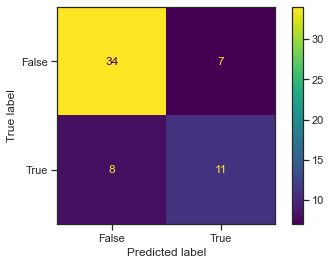

In [91]:
disp=ConfusionMatrixDisplay(tree_cm,display_labels=clf.classes_)
disp.plot()
#sns.heatmap(tree_cm, annot = True)
plt.show()

In [92]:
print(classification_report(Y_test, tree_predicted))

              precision    recall  f1-score   support

       False       0.81      0.83      0.82        41
        True       0.61      0.58      0.59        19

    accuracy                           0.75        60
   macro avg       0.71      0.70      0.71        60
weighted avg       0.75      0.75      0.75        60



In [93]:
print("[Train/test split] score for the Decision Tree: {:.5f}".format(clf1.score(X_test, Y_test)))

[Train/test split] score for the Decision Tree: 0.75000


In [94]:
f = tree.export_graphviz(clf, out_file= None,feature_names=df.iloc[:,new_Ind].columns,class_names='DEATH_EVENT', filled=True,rounded=True,special_characters=True)
graph = graphviz.Source(f, format="png") 
graph.view()


'Source.gv.png'

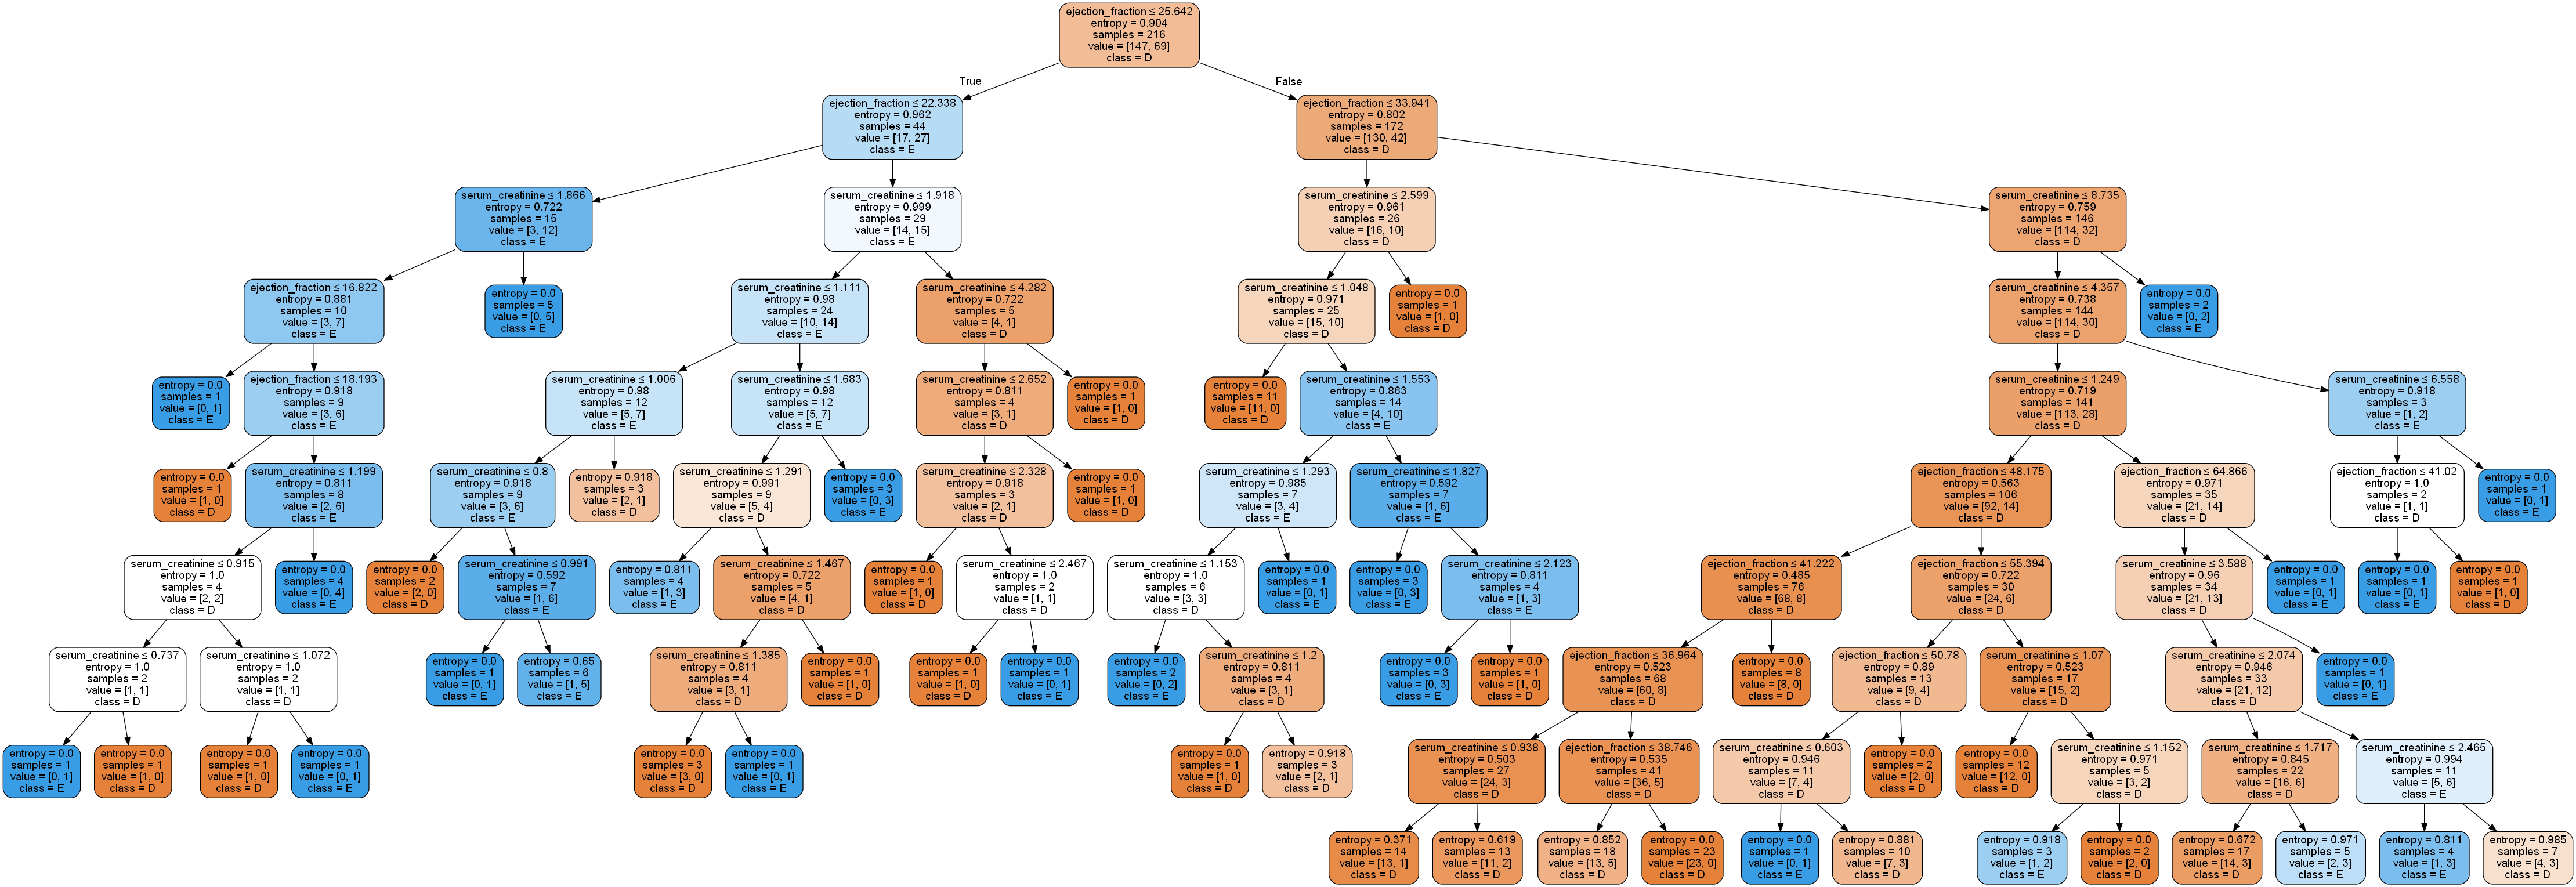

In [95]:

Image('Source.gv.png')
